In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)
- Pastikan setiap kolom dataset memiliki tipe data yang tepat, tidak ada data kosong, bebas dari duplikat, dan berada di range value yang tepat.
- Keluarkan statistik kolom baik numerik maupun kategorikal, cari bentuk distribusi setiap kolom (numerik), dan jumlah baris untuk setiap unique value (kategorikal).
- Cari tahu apakah ada kolom-kolom yang berkorelasi kuat satu sama lain.

- A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?

- B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
- C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)

In [2]:
df = pd.read_csv('flight.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

## HASIL PENGAMATAN:

- Dataset terdiri dari 62988 baris dan 22 kolom.
- Terdapat 7 kolom yang missing value (Non-null count < Jumlah baris) yaitu: GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, SUM_YR_1, dan SUM_YR_2.
- FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE bertipe data object bisa diganti ke dalam datetime.
- Selain itu, sepertinya tipe data di setiap kolom sudah sesuai.

## Numeric Features

In [4]:
colm = df.select_dtypes(include=['number'])
nums = colm.columns.tolist()
colm.sample(5)

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
35764,60502,4,34.0,12,2983,3686.0,2152.0,12754,202,39.454545,113,0,0.446498,2983,0
20944,50293,4,36.0,15,10961,7276.0,3715.0,14725,120,40.428571,223,0,0.793615,10961,0
21471,62236,4,47.0,13,9139,3368.0,6784.0,21984,122,34.000000,217,0,0.517324,9139,0
59157,60323,4,42.0,2,967,1562.0,0.0,1828,424,0.000000,0,0,0.764688,967,0
49882,15727,4,54.0,2,2673,2724.0,0.0,2863,644,2.000000,2,0,0.968285,2673,0


## Non-Numerical Features

In [5]:
cols = df.select_dtypes(exclude=['number', 'datetime'])
cats = cols.columns.tolist()
cols.sample(5)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
34267,7/2/2009,7/2/2009,Male,kunming,yunnan,CN,3/31/2014,2014/2/29 0:00:00
55093,11/3/2006,11/6/2006,Male,shenyangshi,liaoningsheng,CN,3/31/2014,2/21/2014
25424,10/31/2007,10/31/2007,Male,changchun,jilin,CN,3/31/2014,1/9/2013
31572,9/30/2009,9/30/2009,Male,dalian,liaoning,CN,3/31/2014,1/15/2014
41873,8/12/2012,11/8/2012,Female,guangzhou,guangdong,CN,3/31/2014,7/6/2013


HASIL PENGAMATAN:

- Terdapat 15 kolom numerik.
- Terdapat 8 kolom kategorikal, di mana kolom FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, dan LAST_FLIGHT_DATE bisa diganti menjadi tipe data datetime.

In [6]:
df.duplicated().sum()

0

In [7]:
mv = df.isnull().sum()
tmv = df.isnull().count()

pmv = mv*100/tmv

mdf = pd.concat([mv,pmv],axis=1)
mdf.columns = ['Missing Value Total', 'Missing Value Percentage (%)']
mdf.sort_values(by='Missing Value Percentage (%)', ascending=False)

,Missing Value Total,Missing Value Percentage (%)
WORK_PROVINCE,3248,5.156538
WORK_CITY,2269,3.602273
SUM_YR_1,551,0.874770
AGE,420,0.666794
SUM_YR_2,138,0.219089
WORK_COUNTRY,26,0.041278
GENDER,3,0.004763
MEMBER_NO,0,0.000000
LAST_FLIGHT_DATE,0,0.000000
Points_Sum,0,0.000000


HASIL PENGAMATAN:

- Terdapat 7 kolom yang memiliki missing value, yaitu: GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, SUM_YR_1, dan SUM_YR_2.
- Ketujuh kolom tersebut memiliki persentase missing value < 5.2% sehingga akan di-drop saat melakukan data pre-processing.
- Kita dapat memanfaatkan library missingno untuk mengamati persebaran missing value di setiap kolom.

In [8]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


HASIL PENGAMATAN:

- Hampir semua kolom sepertinya right skewed (mean > median), kecuali kolom avg_discount, FFP_TIER, AGE.
- Sepertinya nilai maksimum dari FLIGHT_COUNT sangat berbeda jauh dengan nilai p50 dan p75. Begitu juga dengan kolom-kolom lain yang right skewed (nilai meannya jauh lebih besar dari nilai mediannya).

In [9]:
df[cats].describe().T

,count,unique,top,freq
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


HASIL PENGAMATAN:

- Kolom FFP_DATE, FIRST_FLIGHT_DATE, dan LAST_FLIGHT_DATE memiliki unique value > 700. Sebaiknya diganti menjadi datetime.
- Kolom LOAD_TIME hanya memiliki 1 unique value. Artinya, kolom ini bisa di-drop saja karena tidak bermanfaat dalam pemodelan.
- Sepertinya Kolom Gender tidak memiliki masalah, karena unique value-nya sudah berjumlah 2 dan dibuat dalam binary. Sepertinya ada sedikit ketimpangan jumlah data pada kolom ini.
- Kolom WORK_CITY, WORK_PROVINCE, dan WORK_COUNTRY memiliki kardinalitas yang tinggi.

Sekarang, kita coba tamplikan semua unique values dari setiap kolom. Hal ini perlu dilakukan untuk mengetahui apakah ada value yang tidak konsisten pada data kita.

In [10]:
for i in cats:
    total = df[i].nunique()
    print(f'unique value kolom {i}:', 'total:', total)
    print(f'{df[i].unique()}\n')

unique value kolom FFP_DATE: total: 3068
['11/2/2006' '2/19/2007' '2/1/2007' ... '5/3/2009' '1/25/2010' '5/19/2009']

unique value kolom FIRST_FLIGHT_DATE: total: 3406
['12/24/2008' '8/3/2007' '8/30/2007' ... '3/30/2014' '3/25/2014'
 '3/24/2014']

unique value kolom GENDER: total: 2
['Male' 'Female' nan]

unique value kolom WORK_CITY: total: 3234
['.' nan 'Los Angeles' ... 'BELLREGUARD' 'Danville' 'lingshui']

unique value kolom WORK_PROVINCE: total: 1165
['beijing' 'CA' 'guizhou' ... 'NOTARIO' 'TOPKPPI' 'JAWATIMUR']

unique value kolom WORK_COUNTRY: total: 118
['CN' 'US' 'FR' 'AN' 'JP' 'HK' 'MY' 'AU' 'NL' 'MX' 'CA' 'KR' 'PK' 'TH'
 'SG' 'BR' 'PE' 'AE' 'HN' 'PH' 'ID' 'MO' 'GN' 'FL' 'KH' nan 'TW' 'VN' 'DE'
 'IL' 'CH' 'PA' 'VT' 'EC' 'NG' 'BI' 'GT' 'BE' 'GL' 'NZ' 'FA' 'NI' 'KO'
 'CC' 'UV' 'MN' 'UK' 'AS' 'IT' 'OM' 'SE' 'BZ' 'IN' 'KZ' 'PT' 'NO' 'MS'
 'FI' 'UZ' 'NE' 'AT' 'AA' 'HU' 'CY' 'EG' 'MA' '中' 'ES' 'MZ' 'IR' 'SW' 'RE'
 'PS' 'KE' 'SN' 'BB' 'AZ' 'UA' 'LB' 'YE' 'GE' 'SI' 'KA' 'MV' 'RO' 'ZA

HASIL PENGAMATAN:

- Sepertinya setiap unique value pada kolom WORK_CITY dan WORK_PROVINCE perlu dicek konsitensi penulisannya, karena ada value yang lowercase, capitalize, dan uppercase sehingga hal ini perlu disamakan.
- Terdapat unique value dengan penulisan mandarin pada kolom WORK_COUNTRY sehingga ini juga perlu diperbaiki. Contonya 芬, 沈, dan lainnya.
- Selain itu, sepertinya tidak ada masalah yang berarti.

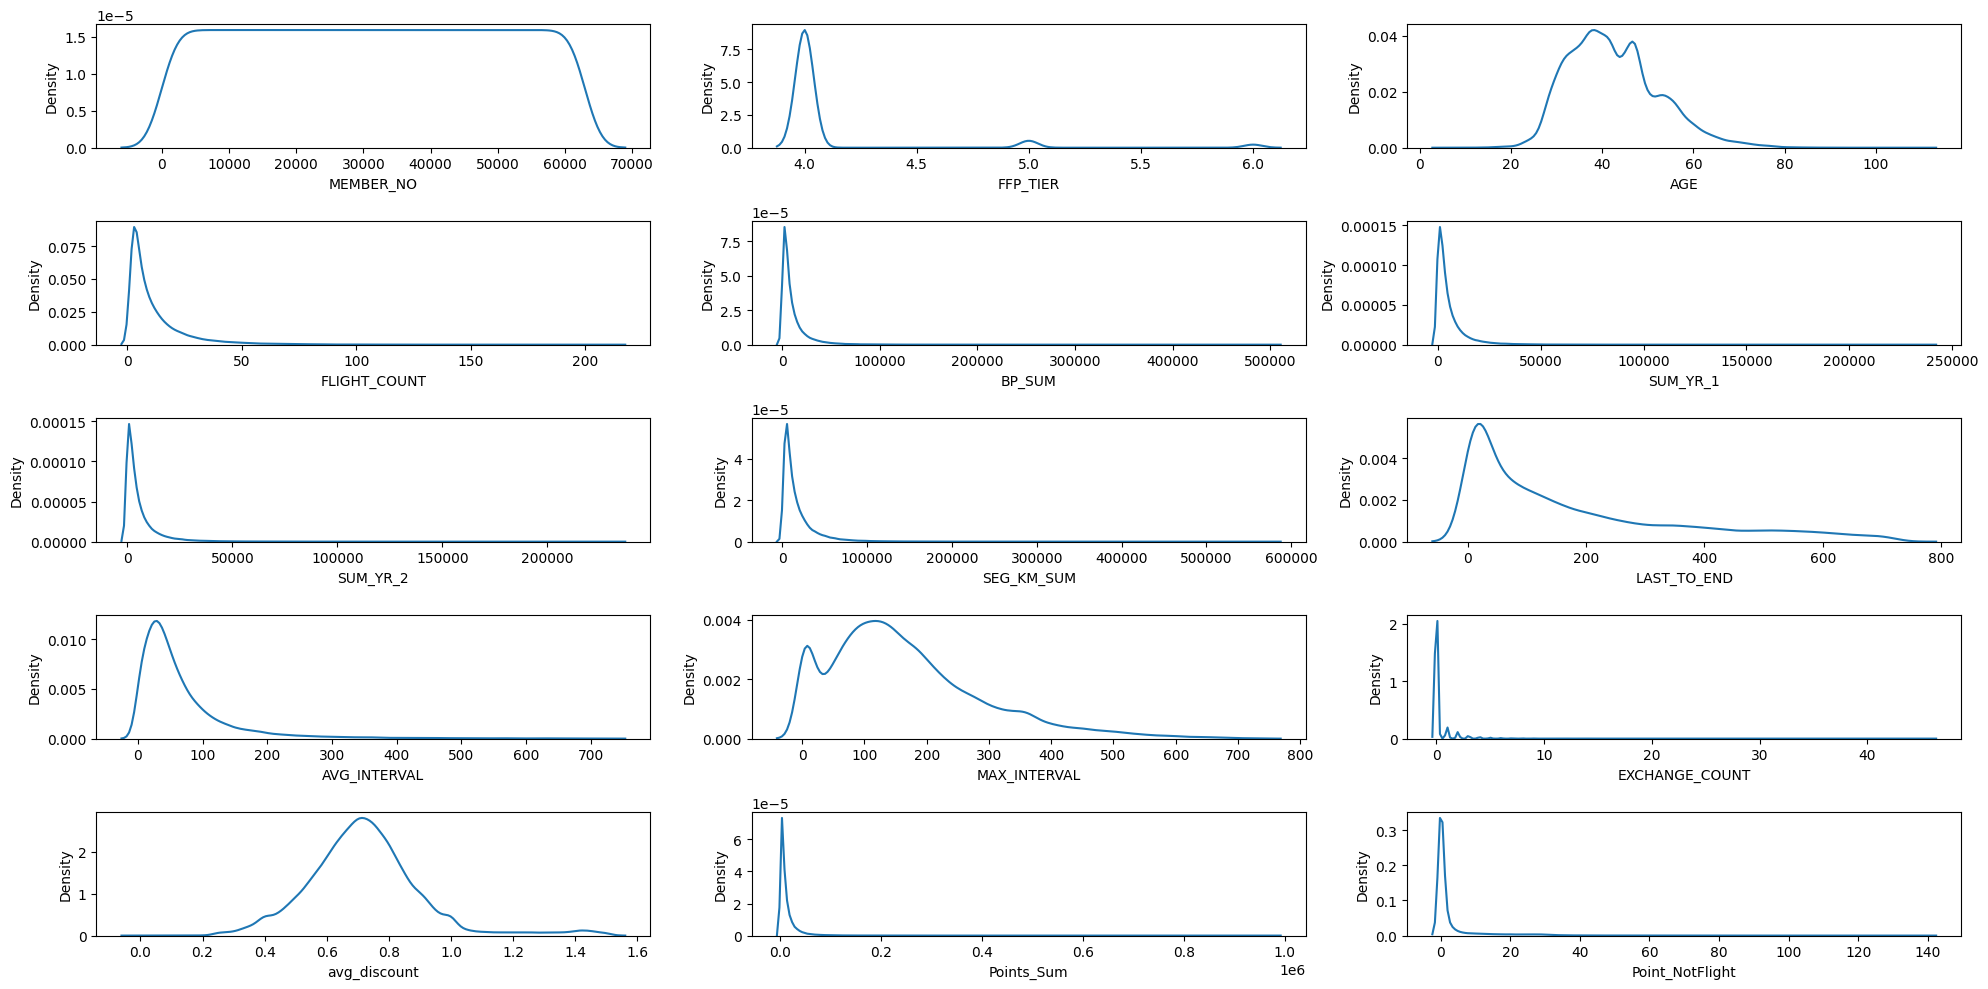

In [11]:
plt.figure(figsize=(20,10))
for i in range(len(nums)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x = df[nums[i]])
plt.tight_layout()

HASIL PENGAMATAN:

Kolom avg_discount, FFP_TIER, AGE memiliki distribusi data yang normal. Selain itu, kolom lainnya memiliki distribusi right skewed.

C:\Users\Teguh Ferdianto\AppData\Local\Temp\ipykernel_12924\2645493919.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

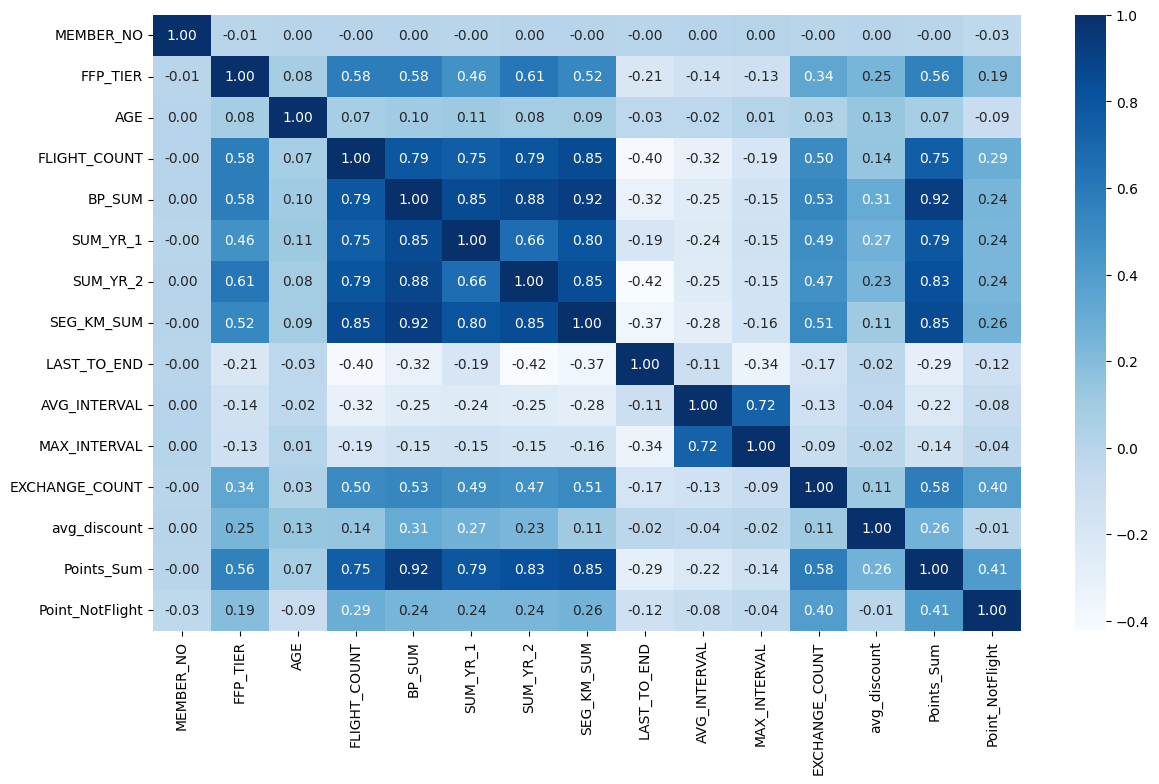

In [12]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

# HASIL PENGAMATAN:
- Kolom `FLIGHT_COUNT` memiliki korelasi yang kuat >= 0.75 dengan beberapa kolom seperti kolom `Ponit_ Sum`, `SEG_KM_SUM`,`SUM_YR_2`, `SUM_YR_1`, `BP_SUM`.
- Kolom `BP_SUM` memiliki korelasi yang kuat >= 0.88 dengan beberapa kolom seperti kolom `Points_Sum`, `SEG_KM_SUM`, `SUM_YR_2`, `SUM_YR_1`.
- Kolom `SUM_YR1` memiliki korelasi yang kuat >= 0.79 dengan kolom `Points_Sum` dan `SEG_KM_SUM`.
- Kolom `SUM_YR2` memiliki korelasi yang kuat >= 0.83 dengan kolom `Points_Sum` dan `SEG_KM_SUM`.
- Kolom `SEG_KM_SUM` memiliki korelasi yang kuat 0.85 dengan kolom `Points_Sum`.

## Pre-processing
untuk Fitur yang kami pilih untuk clustering yaitu:

- Recency (R) : 'LAST_TO_END'
- Frequency (F) : 'FLIGHT_COUNT'
- Monetary (M) : 'SEG_KM_SUM'

In [14]:
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
# bulan Februari (2), hanya memiliki 28 hari, sehingga harus diubah menjadi tgl 28
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00','2014/2/28  0:00:00') 
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'])

df['TahunTerbang'] = df['LAST_FLIGHT_DATE'].dt.year - df['FIRST_FLIGHT_DATE'].dt.year
df['FlightCount/TahunTerbang'] = df['FLIGHT_COUNT']/df['TahunTerbang']

df['Revenue/Tahun'] = df['SUM_YR_1']/df['TahunTerbang']

In [19]:
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,TahunTerbang,FlightCount/TahunTerbang
0,54993,11/2/2006,2008-12-24,Male,6,.,beijing,CN,31.0,3/31/2014,...,2014-03-31,1,3.483254,18,34,0.961639,619760,50,6,35.000000
1,28065,2/19/2007,2007-08-03,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,2014-03-25,7,5.194245,17,29,1.252314,415768,33,7,20.000000
2,55106,2/1/2007,2007-08-30,Male,6,.,beijing,CN,40.0,3/31/2014,...,2014-03-21,11,5.298507,18,20,1.254676,406361,26,7,19.285714
3,21189,8/22/2008,2008-08-23,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,2013-12-26,97,27.863636,73,11,1.090870,372204,12,5,4.600000
4,39546,4/10/2009,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,2014-03-27,5,4.788079,47,27,0.970658,338813,39,5,30.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,18375,5/20/2011,2013-06-05,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,...,2013-06-09,297,4.000000,4,1,0.000000,12318,22,0,inf
62984,36041,3/8/2010,2013-09-14,Male,4,foshan,guangdong,CN,38.0,3/31/2014,...,2014-01-03,89,37.000000,60,14,0.000000,106972,43,1,4.000000
62985,45690,3/30/2006,2006-12-02,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,...,2014-03-03,29,166.000000,166,0,0.000000,0,0,8,0.250000
62986,61027,2/6/2013,2013-02-14,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,...,2013-02-26,400,12.000000,12,0,0.000000,0,0,0,inf


In [18]:
df[['FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE','TahunTerbang','FLIGHT_COUNT','FlightCount/TahunTerbang']].head(3)

,FIRST_FLIGHT_DATE,LAST_FLIGHT_DATE,TahunTerbang,FLIGHT_COUNT,FlightCount/TahunTerbang
0,2008-12-24,2014-03-31,6,210,35.000000
1,2007-08-03,2014-03-25,7,140,20.000000
2,2007-08-30,2014-03-21,7,135,19.285714


In [48]:
features = ['LAST_TO_END', 'FLIGHT_COUNT']
dt = df[['MEMBER_NO', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM']]
dt

,MEMBER_NO,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
0,54993,1,210,580717
1,28065,7,140,293678
2,55106,11,135,283712
3,21189,97,23,281336
4,39546,5,152,309928
...,...,...,...,...
62983,18375,297,2,1134
62984,36041,89,4,8016
62985,45690,29,2,2594
62986,61027,400,2,3934


In [49]:
dt.isna().sum()

MEMBER_NO       0
LAST_TO_END     0
FLIGHT_COUNT    0
SEG_KM_SUM      0
dtype: int64

In [50]:
dt.dtypes

MEMBER_NO       int64
LAST_TO_END     int64
FLIGHT_COUNT    int64
SEG_KM_SUM      int64
dtype: object

Boxplot Sebelum Handling Outlier


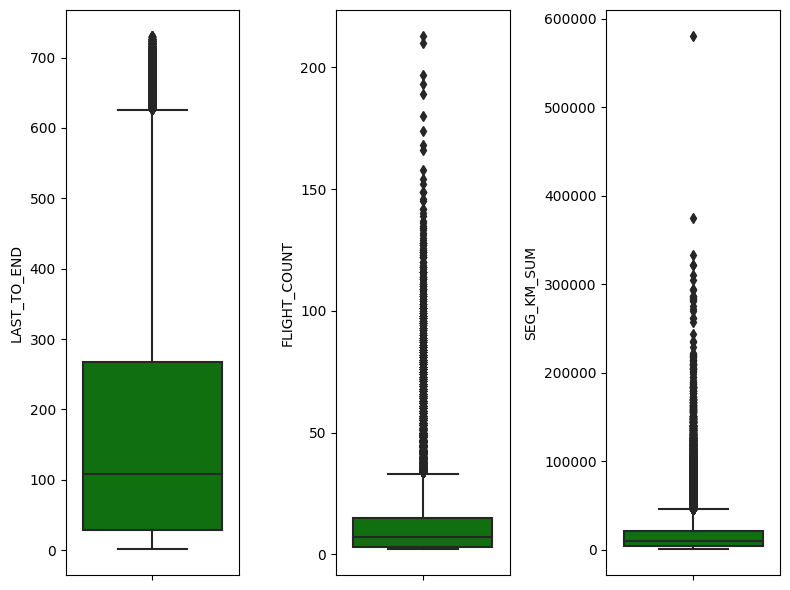

In [51]:
# Boxplot sebelum handling outlier
features2 = ['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM']

cols = features2

print('Boxplot Sebelum Handling Outlier')
plt.figure(figsize=(8,6))
for i in range(0, len(cols)):
    plt.subplot(1,len(cols), i+1)
    sns.boxplot(y=dt[cols[i]],color='green', orient='V')
    plt.tight_layout()

In [52]:
for col in cols:
    high_cut = dt[col].quantile(q=0.99)
    low_cut = dt[col].quantile(q=0.01)
    dt.loc[dt[col]>high_cut,col] = high_cut
    dt.loc[dt[col]<low_cut,col] = low_cut

C:\Users\Teguh Ferdianto\AppData\Local\Temp\ipykernel_20980\855511069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.loc[dt[col]>high_cut,col] = high_cut
C:\Users\Teguh Ferdianto\AppData\Local\Temp\ipykernel_20980\855511069.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt.loc[dt[col]<low_cut,col] = low_cut
C:\Users\Teguh Ferdianto\AppData\Local\Temp\ipykernel_20980\855511069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

Boxplot Setelah Heandling Outlier


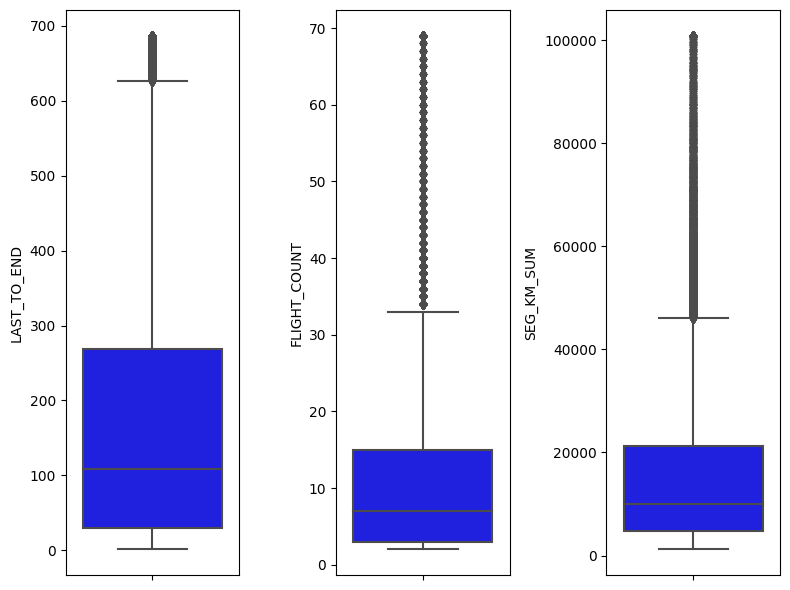

In [69]:
# Boxplot Setelah Handeling Outlier
cols = features2

print('Boxplot Setelah Heandling Outlier')
plt.figure(figsize=(8,6))
for i in range(0, len(cols)):
    plt.subplot(1, len(cols), i+1)
    sns.boxplot(y=dt[cols[i]], color='blue', orient='V')
    plt.tight_layout()

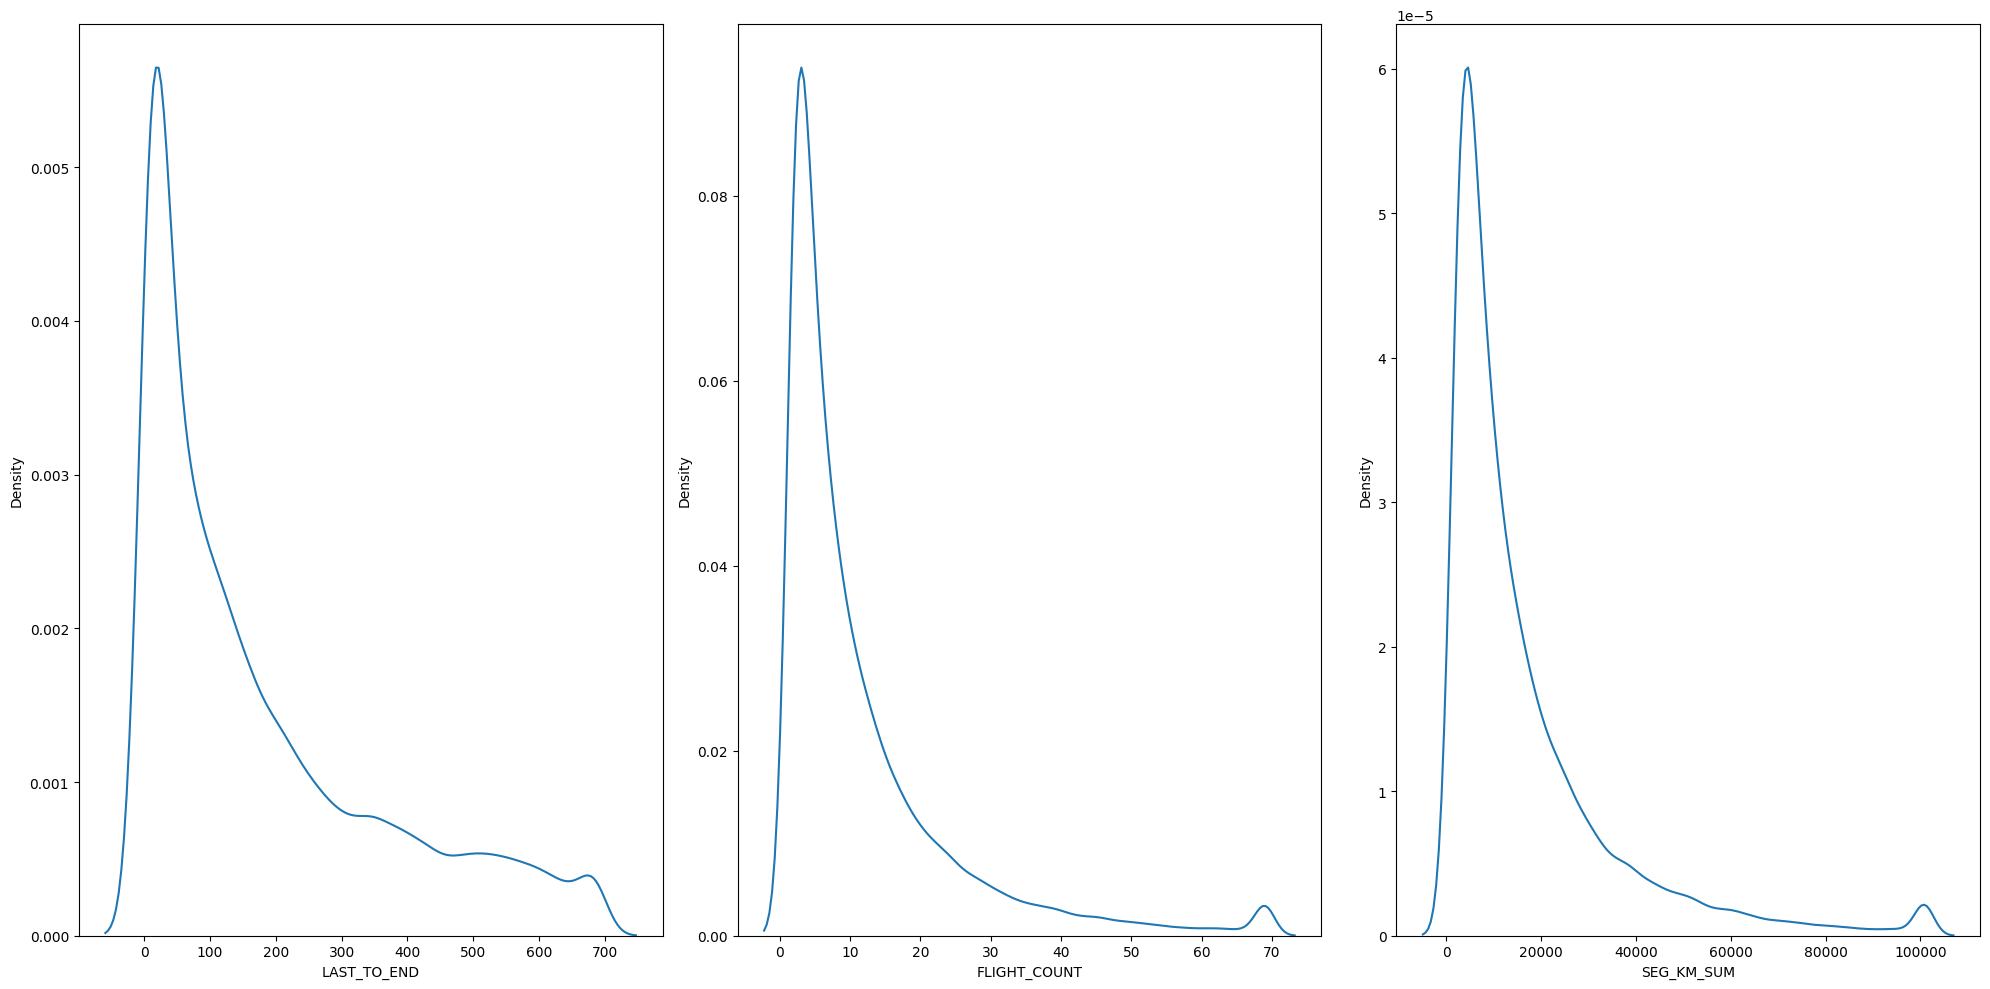

In [70]:
# Mari kita liat KDE plotnya setelah di handeling outlier
plt.figure(figsize=(20,10))
for i in range(len(cols)):
    plt.subplot(1, len(cols), i+1)
    sns.kdeplot(x = dt[cols[i]])
plt.tight_layout()

In [71]:
data = dt[['MEMBER_NO', 'LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM']]
data.head()

,MEMBER_NO,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM
0,54993,1,69,100841.28
1,28065,7,69,100841.28
2,55106,11,69,100841.28
3,21189,97,23,100841.28
4,39546,5,69,100841.28


In [72]:
data_1= data.copy()

In [73]:
df_lrfmc = data
df_lrfmc.columns = ['MEMBER_NO', 'recency','frequency','monetary']
df_lrfmc_drop = df_lrfmc[['recency','frequency','monetary']]

In [74]:
df_lrfmc_drop.head()

,recency,frequency,monetary
0,1,69,100841.28
1,7,69,100841.28
2,11,69,100841.28
3,97,23,100841.28
4,5,69,100841.28


In [75]:
df_lrfmc_drop.describe()

,recency,frequency,monetary
count,62988.000000,62988.000000,62988.000000
mean,175.932574,11.626945,16757.990417
std,183.287089,12.811748,18565.703613
min,1.000000,2.000000,1190.000000
25%,29.000000,3.000000,4747.000000
50%,108.000000,7.000000,9994.000000
75%,268.000000,15.000000,21271.250000
max,687.000000,69.000000,100841.280000


In [76]:
rfm_log = df_lrfmc_drop.copy()


In [77]:
# heandling outlier
cols= ['recency','frequency','monetary']
for col in cols:
    high_cut = rfm_log[col].quantile(q=0.99)
    low_cut=rfm_log[col].quantile(q=0.01)
    rfm_log.loc[rfm_log[col]>high_cut,col]=high_cut
    rfm_log.loc[rfm_log[col]<low_cut,col]=low_cut

In [78]:
from sklearn.preprocessing import MinMaxScaler

df_std = rfm_log
scale = MinMaxScaler()
kolom_all = [x for x in df_std.columns]
for kolom in kolom_all:
    df_std[kolom] = scale.fit_transform(np.array(df_std[kolom]).reshape(-1,1))

df_std.head()

,recency,frequency,monetary
0,0.000000,1.000000,1.0
1,0.008746,1.000000,1.0
2,0.014577,1.000000,1.0
3,0.139942,0.313433,1.0
4,0.005831,1.000000,1.0


## Modelling

c:\Users\Teguh Ferdianto\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Teguh Ferdianto\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Teguh Ferdianto\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Teguh Ferdianto\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Teguh F

<Axes: >

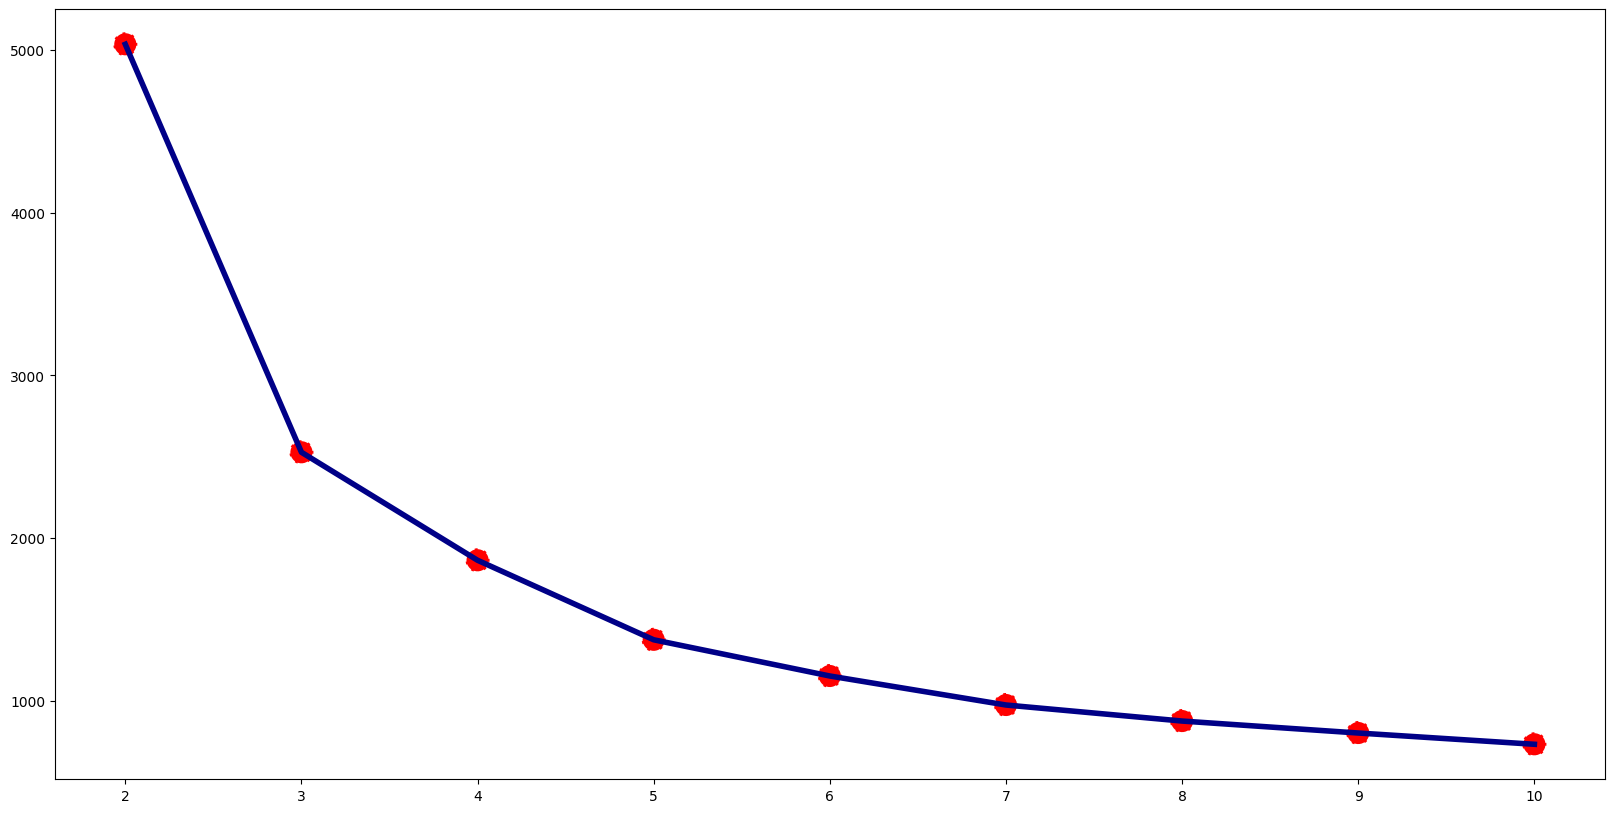

In [79]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2,11):
    k_m= KMeans(n_clusters=i, random_state=142)
    k_m.fit(df_std)
    inertia.append(k_m.inertia_)
plt.figure(figsize=(20,10))

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth=4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='Red', linestyle='--')

In [80]:
k_m = KMeans(n_clusters=3, random_state=0).fit(df_std)

df_data_std= pd.DataFrame(data=df_std, columns=list(data))

df_data_std['clusters']= k_m.labels_
data['clusters']= k_m.labels_

data.head(3)

c:\Users\Teguh Ferdianto\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,MEMBER_NO,recency,frequency,monetary,clusters
0,54993,1,69,100841.28,2
1,28065,7,69,100841.28,2
2,55106,11,69,100841.28,2


In [65]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)


pca.fit(df_std)
pcs = pca.transform(df_std)

In [66]:
data_pca = pd.DataFrame(data= pcs, columns=['PC 1', 'PC 2'])

data_pca.head()

,PC 1,PC 2
0,1.004814,0.707517
1,0.998406,0.713467
2,0.994133,0.717433
3,0.563503,0.450713
4,1.000542,0.711483


<Axes: xlabel='PC 1', ylabel='PC 2'>

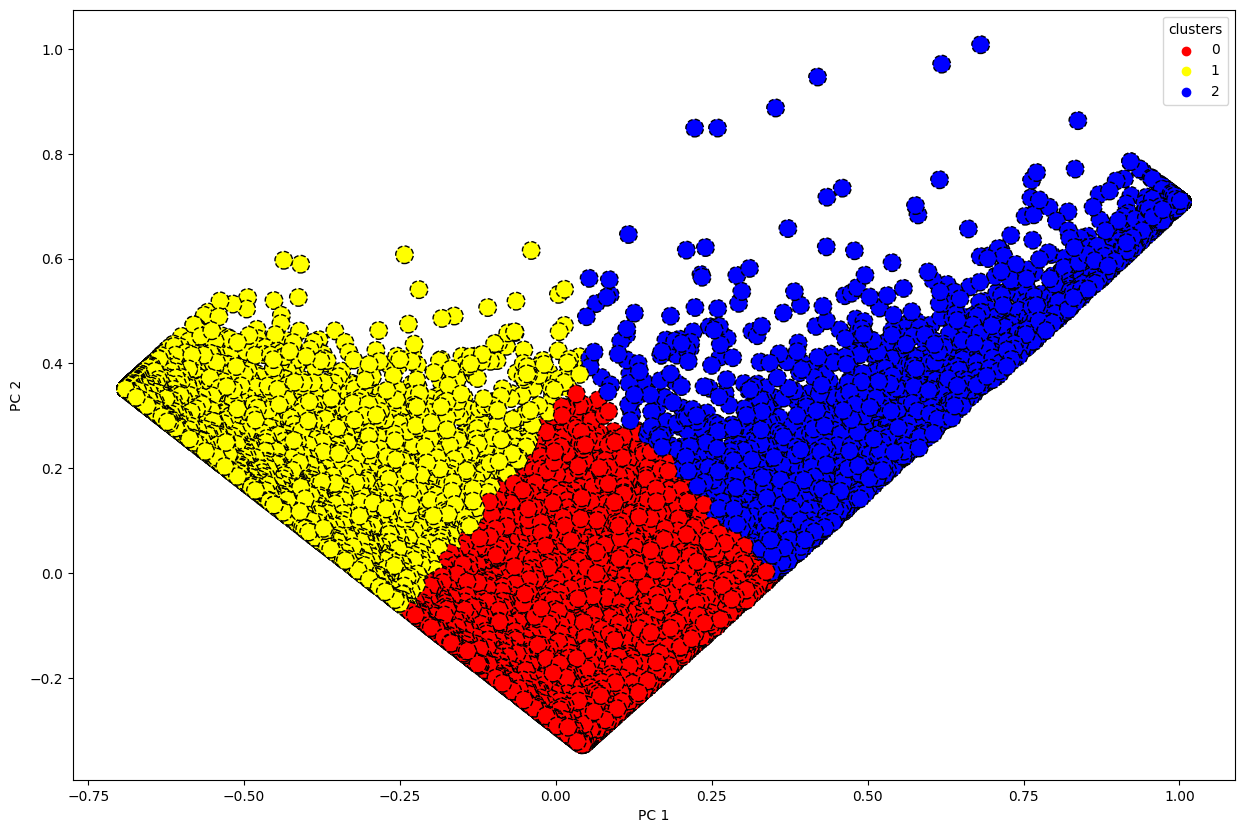

In [81]:
data_pca['clusters'] = data.clusters

fig, ax = plt.subplots(figsize = (15,10))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters',
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['Red', 'yellow', 'Blue'],
    s=160,
    ax=ax)
             

In [82]:
hasil= data.drop('MEMBER_NO', axis=1)
hasil= hasil.groupby('clusters').agg(['mean', 'median'])
hasil

recency         frequency             monetary         
                mean median       mean median          mean   median
clusters                                                            
0          96.405016   79.0   9.035554    8.0  12841.665359  10618.0
1         458.279516  441.0   4.079908    3.0   6333.565118   4526.0
2          32.901111   16.0  38.207667   34.0  55098.441631  49171.0

Berdasarkan data di atas, terlihat bahwa nilai mean jauh lebih besar dibandingkan nilai mediannya, sehingga untuk membuat segmentasi customer kami memanfaatkan nilai median karena lebih merepresentasikan data di setiap cluster.

- 0 : Customer yang jarang melakukan penerbangan tetapi pengeluarannya sedang -> Potential
- 1 :Customer yang sudah lama tidak melakukan penerbangan dengan frekuensi dan pengeluaran yang paling rendah -> Low Value
- 2 : Customer yang sering melakukan penerbangan (frekuensi tertinggi) dan pengeluaran yang tinggi (monetary tinggi) -> Important


Rekomendasi Bisnis:

- Untuk customer Low Value dan Potential (clusters 0 dan clusters1) kami merekomendasikan untuk diberikan promo berupa cash back atau voucher yang menarik sehingga mereka dapat kembali untuk melakukan transaksi. Hal ini karena biaya untuk mempertahankan customer 5 - 25 kali lebih murah dibandingkan untuk mencari customer baru.
- Kami merekemendasikan adanya akumulasi poin dari setiap penerbangan yang dilakukan customer selama satu tahun, lalu customer dengan poin-poin tertinggi (customer Important) akan diberikan undian hadiah. Hal ini bertujuan untuk membuat mereka tetap loyal.